<a href="https://colab.research.google.com/github/jolly-io/Azure-Reviews-A-Latent-Dirichlet-Allocation-Approach/blob/main/Azure_Reviews_LDA_Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSLy7zcEnsei2SIVbSsSvZRSEcnWjvKjGygKw&usqp=CAU" width="700">


August 2. 2023

## Introduction


In this project, I attempt to explore the world of text mining and Natural Language Processing (NLP) in the context of Microsoft Azure cloud reviews. My objective is to leverage the Latent Dirichlet Allocation Topic Modeling technique to analyze the textual data aggregated from a particualr high impact reviews platform, capterra.com to  uncover key trends that maatter to users of the product.

## Research Question:
What are the key trends of Azure Cloud Services ?

## The Dataset

Capterra.com is a global website that helps businesses find and evaluate software products and business services. It has over 900 software categories and over 1 million reviews from real users. Businesses can use Capterra to compare different software solutions, read reviews, and find the best fit for their needs. The dataset I use for this project is an aggregation of over 1300 real user reviews, scrapped from this high impact source.

## Implementation

Below, I sequence the implementation of the process as follows:
- data collection
- data cleaning and preprocessing
- model building and Implementation
- model evaluation and interprettion
- Written Report

Because the dataset was curated from a global platform that curates reviews in both the english language and languages other than the english language, which is not my focus dataset, I begin with the preprocessing step of filtering out non english reviews.  

In [ ]:
#provision required libraries and packages
!pip install langdetect

In [ ]:
!pip install pandas nltk sklearn langdetect

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Import necessary libraries
import pandas as pd
from langdetect import detect
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Read-in the dataset
data = pd.read_csv('reviews_encore_capterra.csv')

# Confirm the number of records
len(data)



1575

In [ ]:
data.head(3)

,Date,Review_Title,Overall,Pros,Cons
0,6-Jun-23,"""One of the big three cloud providers.""",I have 3 Azure certifications at the moment an...,Signing up to previews can be difficult and of...,NaN
1,2-Jun-23,"""Designed to help businesses of all sizes mana...",Our experience with Microsoft Azure has been h...,It offers a wide range of features and tools t...,Slow page load times and occasional glitches i...
2,1-Jun-23,"""Microsoft Azure""",Complicated Experience!,Security and compliance: Azure offers a compre...,Complexity and learning curve: Azure is a robu...


In [ ]:
# Concatenate 'Overall', 'Pros', and 'Cons' columns and detect the language
data['Text'] = data['Overall'].astype(str) + ' ' + data['Pros '].astype(str) + ' ' + data['Cons'].astype(str)
data['Language'] = data['Text'].apply(detect)

In [ ]:
data.head(1)

,Date,Review_Title,Overall,Pros,Cons,Text,Language
0,6-Jun-23,"""One of the big three cloud providers.""",I have 3 Azure certifications at the moment an...,Signing up to previews can be difficult and of...,NaN,I have 3 Azure certifications at the moment an...,en


In [ ]:
# Filter the data to include only English reviews
data = data[data['Language'] == 'en']

In [ ]:
len(data)

1401

**After** extracting non-english reviews we are left with 1401 documents for the core analysis implementation.  Next I initialize and implement the preprocessing phase as described in next cells that follow.

In [ ]:
data.head(3)

,Date,Review_Title,Overall,Pros,Cons,Text,Language
0,6-Jun-23,"""One of the big three cloud providers.""",I have 3 Azure certifications at the moment an...,Signing up to previews can be difficult and of...,NaN,I have 3 Azure certifications at the moment an...,en
1,2-Jun-23,"""Designed to help businesses of all sizes mana...",Our experience with Microsoft Azure has been h...,It offers a wide range of features and tools t...,Slow page load times and occasional glitches i...,Our experience with Microsoft Azure has been h...,en
2,1-Jun-23,"""Microsoft Azure""",Complicated Experience!,Security and compliance: Azure offers a compre...,Complexity and learning curve: Azure is a robu...,Complicated Experience! Security and complianc...,en


In [ ]:
# Set of common English stop words
stop_words = set(stopwords.words('english'))

In [ ]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenize
    words = word_tokenize(text)
    # Define words to remove
    remove_words = ["cloud", "software", "microsoft", "also", "one", "get", "azure", "use", "nan", "platform"]
    # Remove stop words, words to remove, and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word not in remove_words]
    return words


In [ ]:
# Apply the text preprocessing function to the 'Text' column
corpus = data['Text'].apply(preprocess_text)

In [ ]:
corpus

0       [certification, moment, continue, developer, p...
1       [experience, highly, positive, easy, reliable,...
2       [complicated, experience, security, compliance...
3       [conclusion, stand, leading, computing, offeri...
4       [highly, helpful, code, development, debugging...
                              ...                        
1569    [easy, online, instruction, excellent, used, o...
1570    [virtual, machine, product, seems, better, cou...
1571    [us, large, scale, virtualization, data, cente...
1573    [really, liked, allows, create, great, thing, ...
1574    [powerful, easy, help, lot, business, routine,...
Name: Text, Length: 1401, dtype: object

In [ ]:
len(corpus)

1401

In [ ]:
# Create a bag of words and count the frequency of each word
bag_of_words = [word for sublist in corpus.tolist() for word in sublist]
word_freq = Counter(bag_of_words)

In [ ]:
# Print the 10 most common words
print(word_freq.most_common(10))

[('service', 1083), ('easy', 614), ('feature', 526), ('need', 492), ('like', 457), ('user', 451), ('application', 426), ('data', 411), ('time', 403), ('support', 397)]


## Latent Dirichlet Allocation Modeling

Next for the LDA modeling phase, I create the pipeline by undertaking the transformation as described below.

In [ ]:
# Convert list of words in each document to a string
corpus = corpus.apply(' '.join)

# Ensure corpus is always in the same order
corpus = corpus.sort_index()

# Number of topics for LDA
n_topics = 10

# Create a CountVectorizer for parsing/counting words
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000)
count = count_vectorizer.fit_transform(corpus)

# Run LDA
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0, n_jobs=1)
lda.fit(count)

# For each topic, print the top 10 most representative words
words = count_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"\nTopic #{topic_idx + 1}:")
    print(" ".join([words[i] for i in topic.argsort()[:-11:-1]]))


Topic #1:
product data application machine virtual management development easy integration work

Topic #2:
service using free solution aws little like product bit google

Topic #3:
time need cost data storage resource feature company server pay

Topic #4:
easy application service web great feature issue like fast app

Topic #5:
good time server really used support lot would feature like

Topic #6:
service business feature user computing security offer range application provides

Topic #7:
service need cost like feature high pricing available product security

Topic #8:
service server virtual machine work company cost time great application

Topic #9:
easy service feature support like user need lot great good

Topic #10:
service like make using experience tool user easy much easier


After fitting the LDA model, the output above is a visualization of the most representative words for each our ten topics.

## Cluster Analysis


Next I implement the cluster analysis phase below, begining with pipeline creation

In [ ]:
# create vector  dataset
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Vectorize the text data
X = vectorizer.fit_transform(corpus)

# Print the feature names (words) in the vocabulary
print("Vocabulary:")
print(vectorizer.get_feature_names_out())

# Print the vectorized representation of the first document
print("Vectorized representation of the first document:")
print(X[0].toarray())



Vocabulary:
['aaa' 'abd' 'ability' ... 'zendesk' 'zero' 'zone']
Vectorized representation of the first document:
[[0 0 0 ... 0 0 0]]


In [ ]:
# Apply K-means clustering
num_clusters = 5  #
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Print the cluster labels for each document
for i, cluster in enumerate(cluster_labels):
    print(f"Document {i}: Cluster {cluster}")

Document 0: Cluster 4
Document 1: Cluster 3
Document 2: Cluster 0
Document 3: Cluster 3
Document 4: Cluster 2
Document 5: Cluster 2
Document 6: Cluster 0
Document 7: Cluster 3
Document 8: Cluster 4
Document 9: Cluster 2
Document 10: Cluster 3
Document 11: Cluster 4
Document 12: Cluster 4
Document 13: Cluster 3
Document 14: Cluster 0
Document 15: Cluster 0
Document 16: Cluster 0
Document 17: Cluster 0
Document 18: Cluster 4
Document 19: Cluster 3
Document 20: Cluster 3
Document 21: Cluster 3
Document 22: Cluster 0
Document 23: Cluster 3
Document 24: Cluster 0
Document 25: Cluster 0
Document 26: Cluster 3
Document 27: Cluster 3
Document 28: Cluster 3
Document 29: Cluster 0
Document 30: Cluster 3
Document 31: Cluster 3
Document 32: Cluster 1
Document 33: Cluster 1
Document 34: Cluster 3
Document 35: Cluster 4
Document 36: Cluster 3
Document 37: Cluster 0
Document 38: Cluster 0
Document 39: Cluster 4
Document 40: Cluster 2
Document 41: Cluster 4
Document 42: Cluster 4
Document 43: Cluster 

In [ ]:
print("Documents in Each Cluster:")
for cluster_id in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_documents = [corpus_strings[i] for i in cluster_indices]
    print(f"Cluster {cluster_id} - Document Count: {len(cluster_documents)}")
    print("\n".join(cluster_documents[:5]))  # Print the first few documents in each cluster
    print()  # Print an empty line to separate clusters



Documents in Each Cluster:
Cluster 0 - Document Count: 231
c o m p l i c a t e d   e x p e r i e n c e   s e c u r i t y   c o m p l i a n c e   o f f e r   c o m p r e h e n s i v e   s e t   s e c u r i t y   f e a t u r e   c o m p l i a n c e   c e r t i f i c a t i o n   p r o v i d i n g   s t r o n g   d a t a   p r o t e c t i o n   r e g u l a t o r y   c o m p l i a n c e   u s e r   a p p r e c i a t e   b u i l t   s e c u r i t y   c o n t r o l   i d e n t i t y   m a n a g e m e n t   a c t i v e   d i r e c t o r y   a b i l i t y   m e e t   i n d u s t r y   s p e c i f i c   s e c u r i t y   r e q u i r e m e n t   c o m p l e x i t y   l e a r n i n g   c u r v e   r o b u s t   f e a t u r e   r i c h   m a k e   c o m p l e x   e s p e c i a l l y   u s e r   n e w   c o m p u t i n g   l e a r n i n g   c u r v e   s t e e p   r e q u i r i n g   t i m e   e f f o r t   b e c o m e   p r o f i c i e n t   n a v i g a t i n g   u t i l i z i n g   e x t e n s i v

The output above is a visualization of the representative documents in the five clusters created

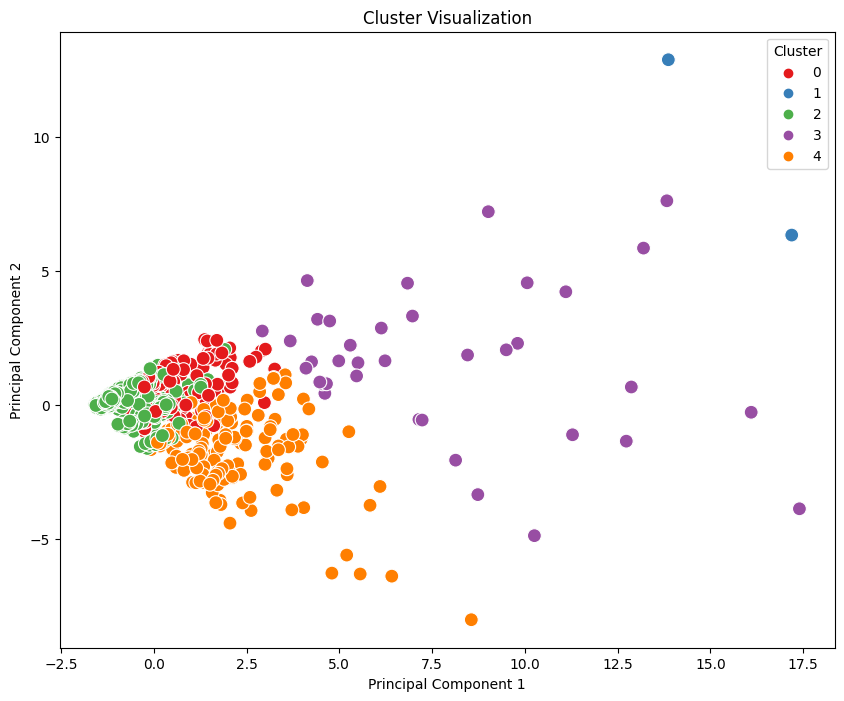

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())  # Convert sparse matrix to array for PCA

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette="Set1", s=100)
plt.title("Cluster Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


**LDA (Latent Dirichlet Allocation) and Clustering analysis together can help us assign labels to each cluster based on the topics identified by LDA**

In [ ]:
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation

# Perform LDA to identify topics
num_topics = 5  # You can adjust the number of topics
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=0)
topic_weights = lda_model.fit_transform(X)

# Get the dominant topic for each cluster
cluster_dominant_topics = []
for cluster_idx in range(num_clusters):
    cluster_indices = np.where(cluster_assignments == cluster_idx)[0]
    if len(cluster_indices) == 0:
        continue
    average_topic_weights = np.mean(topic_weights[cluster_indices], axis=0)
    dominant_topic = np.argmax(average_topic_weights)
    cluster_dominant_topics.append(dominant_topic)

# Define meaningful labels for each topic
topic_labels = [
    "Application Development and Data Management"
     "Comparing Free Cloud Solutions"
     "Cost and Resource Management"
     "Web Application Features and Performance"
     "Server Support and Feature Usage"
     "Business Security and Cloud Services"
     "Security and Pricing Selection"
     "Server and Application Performance in the Workplace"
     "Service Support"
     "User Experience and Ease of Use"
]

# Assign labels to clusters based on dominant topics
cluster_topic_labels = [topic_labels[topic_idx] for topic_idx in cluster_dominant_topics]

# Print cluster labels with assigned topic labels
for cluster_idx, label in enumerate(cluster_topic_labels):
    print(f"Cluster {cluster_idx}: {label}")


Cluster 0: Application Development and Data ManagementComparing Free Cloud SolutionsCost and Resource ManagementWeb Application Features and PerformanceServer Support and Feature UsageBusiness Security and Cloud ServicesSecurity and Pricing SelectionServer and Application Performance in the WorkplaceService SupportUser Experience and Ease of Use
Cluster 1: Application Development and Data ManagementComparing Free Cloud SolutionsCost and Resource ManagementWeb Application Features and PerformanceServer Support and Feature UsageBusiness Security and Cloud ServicesSecurity and Pricing SelectionServer and Application Performance in the WorkplaceService SupportUser Experience and Ease of Use
Cluster 2: Application Development and Data ManagementComparing Free Cloud SolutionsCost and Resource ManagementWeb Application Features and PerformanceServer Support and Feature UsageBusiness Security and Cloud ServicesSecurity and Pricing SelectionServer and Application Performance in the WorkplaceSer

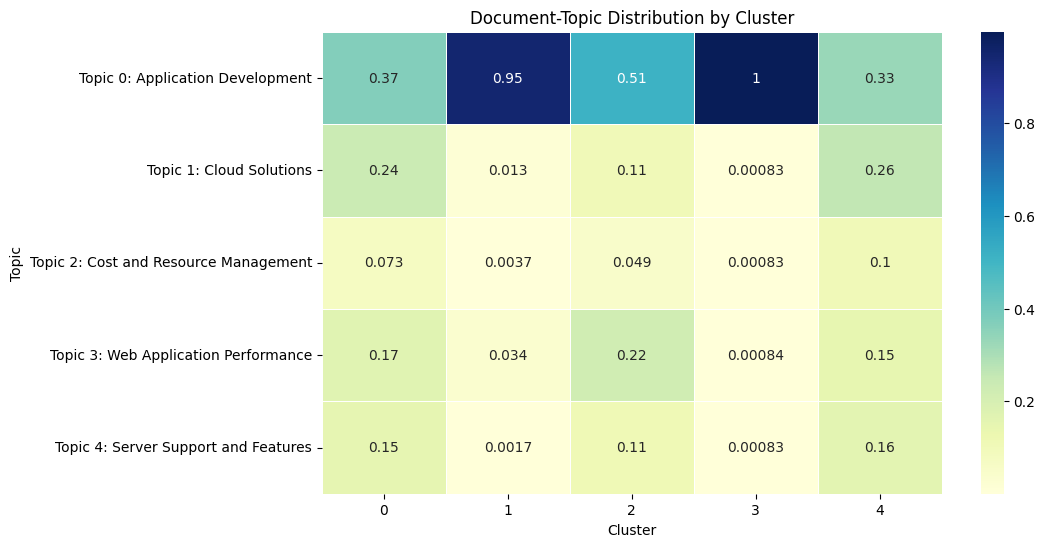

Top 5 words for Topic 0: Application Development: service, feature, need, application, user
Top 5 words for Topic 1: Cloud Solutions: easy, product, like, thing, great
Top 5 words for Topic 2: Cost and Resource Management: easy, user, cost, good, like
Top 5 words for Topic 3: Web Application Performance: service, like, application, data, using
Top 5 words for Topic 4: Server Support and Features: server, virtual, service, easy, machine


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Get the document-topic probabilities from the LDA model
doc_topic_prob = lda_model.transform(X)

# Create a DataFrame for the document-topic distribution
doc_topic_df = pd.DataFrame(doc_topic_prob, columns=[f"Topic {i}" for i in range(num_topics)])

# Add a column for cluster labels
doc_topic_df["Cluster"] = cluster_assignments

# Group the data by cluster and calculate the mean probabilities
cluster_topic_means = doc_topic_df.groupby("Cluster").mean()

# Define topic labels
topic_labels = [
    "Topic 0: Application Development",
    "Topic 1: Cloud Solutions",
    "Topic 2: Cost and Resource Management",
    "Topic 3: Web Application Performance",
    "Topic 4: Server Support and Features"
]

# Create a heatmap with topic labels on y-axis
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_topic_means.T, cmap="YlGnBu", linewidths=0.5, annot=True, yticklabels=topic_labels)
plt.title("Document-Topic Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Topic")
plt.show()

# Print the top 'n' words for each topic
def print_top_words_per_topic(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_indices]
        print(f"Top {n_top_words} words for {topic_labels[topic_idx]}: {', '.join(top_words)}")

# Get the feature names from the CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Print the top 'n' words for each topic
n_top_words = 5  # You can choose the number of top words to display for each topic
print_top_words_per_topic(lda_model, feature_names, n_top_words)


In the heatmap above, we observe a dominance of topic 0: appliation developement in cluster 1 and cluster 3. Yet across all five cluster topic 0 appears to be noticeably represented but has the strongest prescence in clusters 1 and 3


*Below* I print the top five words representative of each of the five clusters

In [ ]:
import pandas as pd
from wordcloud import WordCloud

# Print the top 'n' words for each topic
n_top_words = 5  # You can choose the number of top words to display for each topic
print_top_words_per_topic(lda_model, feature_names, n_top_words)


Top 5 words for Topic 0: Application Development: service, feature, need, application, user
Top 5 words for Topic 1: Cloud Solutions: easy, product, like, thing, great
Top 5 words for Topic 2: Cost and Resource Management: easy, user, cost, good, like
Top 5 words for Topic 3: Web Application Performance: service, like, application, data, using
Top 5 words for Topic 4: Server Support and Features: server, virtual, service, easy, machine
